문제 1. 정확도 97% 성능의 MNIST 분류기

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# MNIST 데이터 로드
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)  # 타깃을 정수로 변환

In [9]:
# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=15)

# 모델 및 그리드서치 매개변수 설정
knn_clf = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 12],
    'weights': ['distance']
}


In [10]:
# 그리드서치 객체 생성
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy')

# 그리드서치 실행
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10, 12],
                         'weights': ['distance']},
             scoring='accuracy')

In [11]:
# 최적의 매개변수 및 최고 정확도 출력
print("Best parameters:", grid_search.best_params_)
print("Best accuracy on validation set:", grid_search.best_score_)

Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best accuracy on validation set: 0.9427499623352649


In [12]:
# 테스트 세트를 사용한 모델 평가
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy * 100}%")

Test set accuracy: 95.27857142857142%


문제2

In [1]:
# 필요한 라이브러리들을 import
!pip install tensorflow

import numpy as np
from tensorflow.keras.datasets import mnist
from scipy.ndimage import shift
from tensorflow.keras import models, layers

# MNIST 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 이미지를 이동시키는 함수
def shift_image(image, dx, dy):
    return shift(image, [dy, dx], cval=0)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


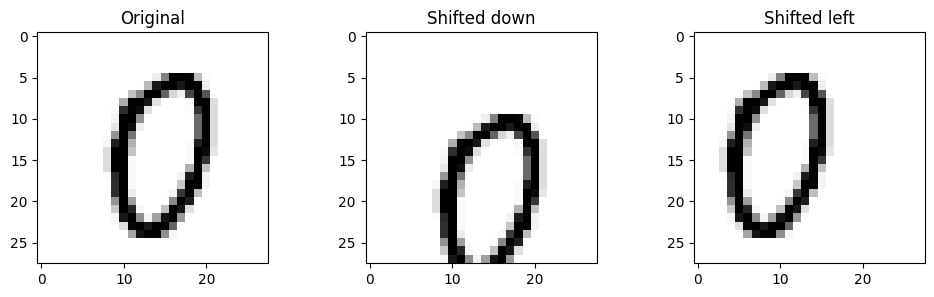

In [2]:
# shift_image() 함수 작동 확인

import matplotlib.pyplot as plt

image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [3]:
# 훈련 데이터의 이미지를 상하좌우로 1픽셀씩 이동 후 훈련셋에 추가
import numpy as np

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1,0), (1,0), (0,1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [4]:
# 추가된 이미지 순서 섞기
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
# 모델 재훈련

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# 데이터 차원 확인 및 변환
X_train_augmented_flat = X_train_augmented.reshape(-1, 28*28)  # 28x28 이미지를 784 픽셀로 평탄화

# 최적의 하이퍼파라미터
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 12],
    'weights': ['distance']
}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_augmented_flat, y_train_augmented)  # 평탄화된 데이터를 사용해 그리드 서치 수행

# 최적의 매개변수를 사용하여 KNN 분류기 생성 및 훈련
best_params = grid_search.best_params_
knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(X_train_augmented_flat, y_train_augmented)  # 수정된 2차원 데이터를 사용하여 모델 훈련

# 테스트 데이터로 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")